# Simple Linear Regession

Plagiarized from:

> https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
dataset = pd.read_csv('data.csv')

In [ ]:
dataset.shape

In [ ]:
dataset.head()

In [ ]:
dataset.describe()

In [ ]:
dataset.plot(x='x', y='y', style='o')
plt.title('X vs Y')
plt.xlabel('Monotonic X')
plt.ylabel('Monotonic Y')
plt.show()

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

In [ ]:
print(regressor.intercept_, regressor.coef_)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

# Generate Some Time-Based Data & Predict

Idea is to:

- Generate some sample data looking like its' time-based
- Perform a linear regression
- Predict 30s ahead

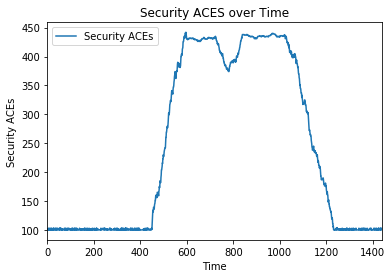

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import util

%matplotlib inline

# df = pd.DataFrame({'Time': time_vals, 'Security ACEs': y_vals})
df = util.gen_random_data_frame()

df.plot(x='Time', y='Security ACEs')
plt.title('Security ACES over Time')
plt.xlabel('Time')
plt.ylabel('Security ACEs')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_, regressor.coef_)

181.6762551023754 [0.08547482]


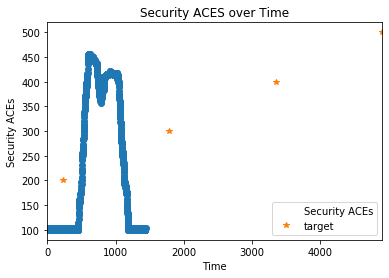

In [4]:
# Solve for when Security ACEs = 500
TARGETS = [200, 300, 400, 500]

t_arr = [ (t - regressor.intercept_) / regressor.coef_[0] for t in TARGETS]
df2 = pd.DataFrame({'t': t_arr, 'target': TARGETS})

ax = df.plot(x='Time', y='Security ACEs', style='o')
df2.plot(x='t', y='target', style='*', ax=ax)
plt.title('Security ACES over Time')
plt.xlabel('Time')
plt.ylabel('Security ACEs')
plt.show()

In [ ]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

# How To Generate "Realistic Data"

Possible steps:

- Normalize day into 1 minute chunks, giving 1440 data points
- Carve up day into random functions:
    - 0000 to 0730: y = 100
    - 0730 to 1000: y = last_y + int(random.random() * 12 - 5)
    - 1000 to 1200: y = last_y + int(random.random() * 3 - 1.5)
    - 1200 to 1300: y = last_y + int(random.random() * 8 - 6)
    - 1300 to 1400: y = last_y + int(random.random() * 8 - 2)
    - 1400 to 1700: y = last_y + int(random.random() * 3 - 1.5)
    - 1700 to 2100: y = last_y + int(random.random() * 8 - 11)

# Experimentation

100.48196721311474 [0.00400111]


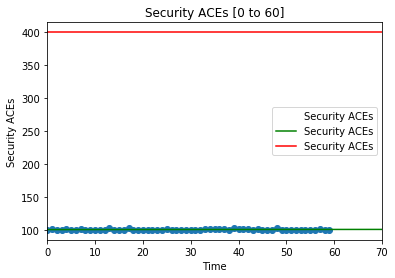

100.45237565990553 [0.00427897]


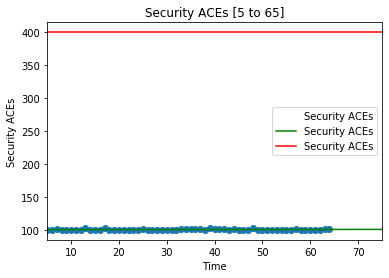

100.5688524590164 [0.00163934]


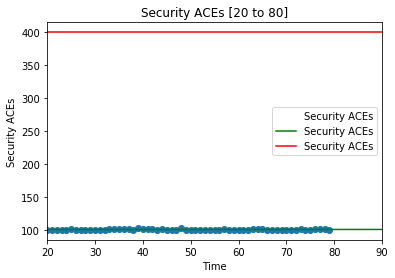

100.04719829582291 [0.00719644]


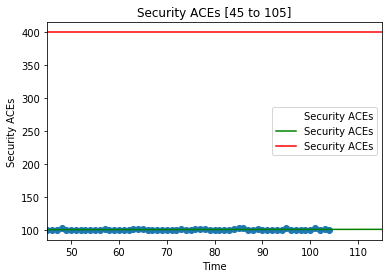

100.00238029082152 [0.00730759]


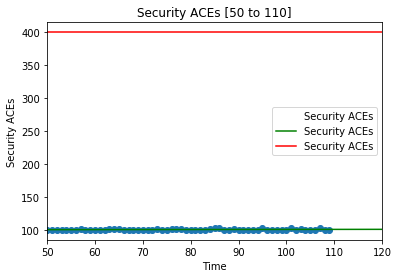

100.43611188293045 [0.00233398]


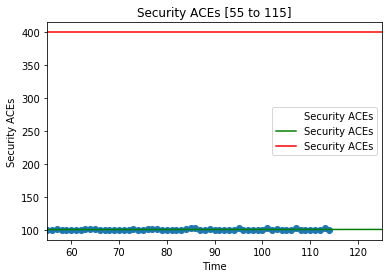

100.63756599055294 [0.00013893]


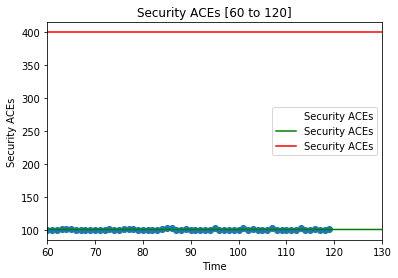

100.3373159210892 [0.00316755]


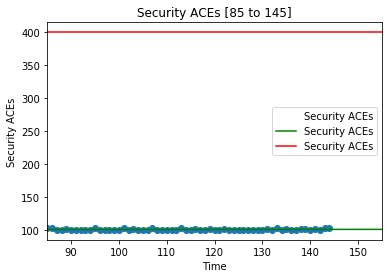

99.13252755395018 [0.01255904]


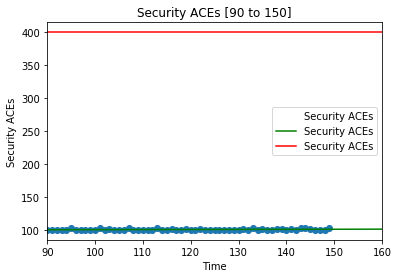

99.51629156247105 [0.00964157]


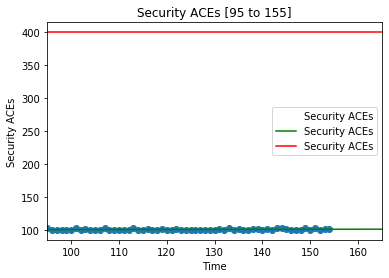

99.87960544595721 [0.00633509]


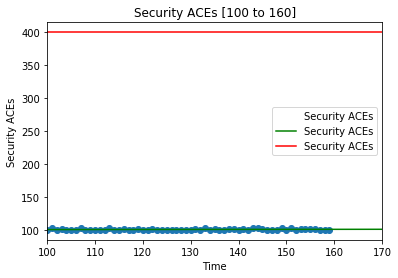

99.01222561822729 [0.01292026]


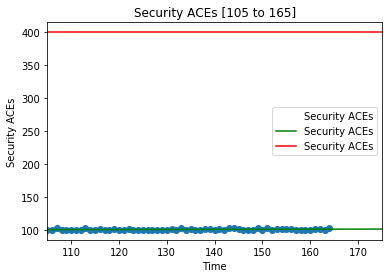

99.15421876447161 [0.01155877]


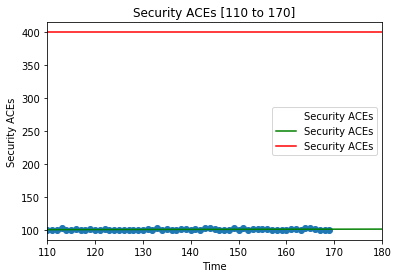

99.91427248309716 [0.00566824]


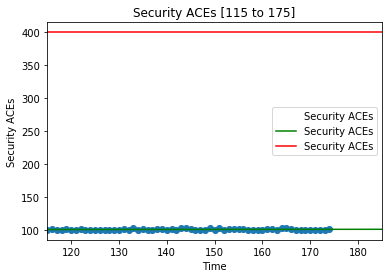

99.58284708715384 [0.00803001]


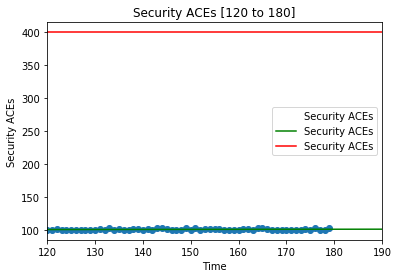

100.6456793553765 [0.00150042]


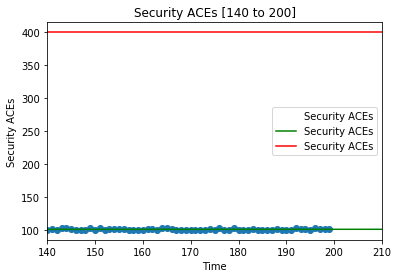

99.76119292396035 [0.00633509]


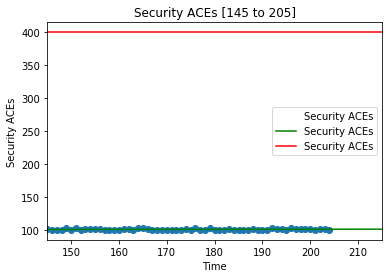

100.73187922571084 [0.00047235]


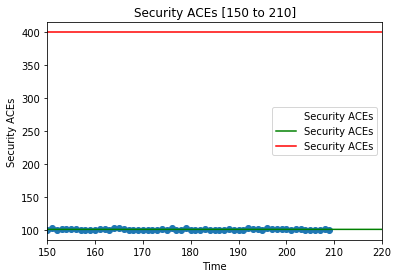

100.36938038343985 [0.00233398]


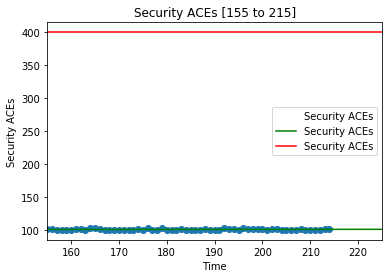

99.38453274057608 [0.00736316]


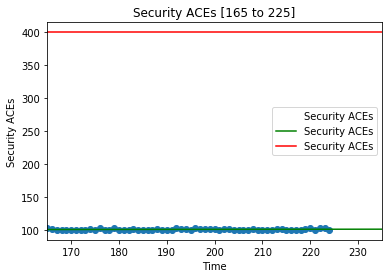

98.25031027137169 [0.01319811]


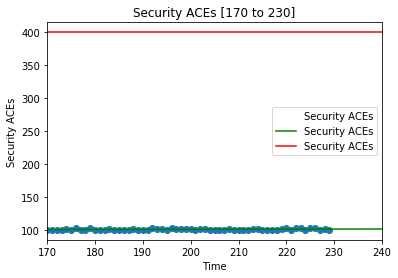

100.83257386311011 [0.00016671]


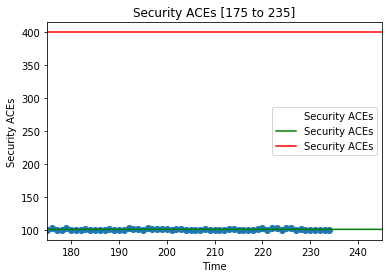

100.21207742891544 [0.00222284]


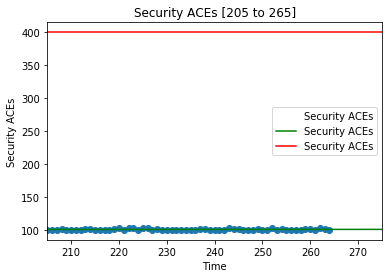

100.30954894878207 [0.00186163]


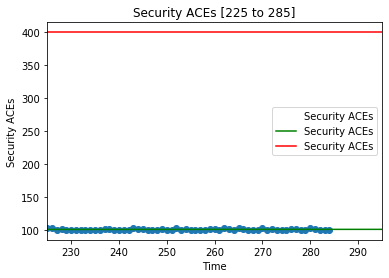

98.25794202093174 [0.00947485]


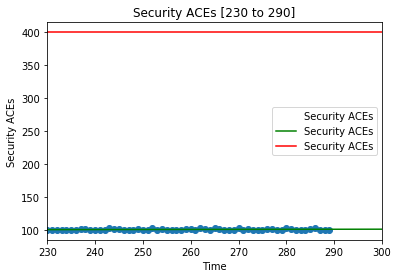

99.87937390015745 [0.00341762]


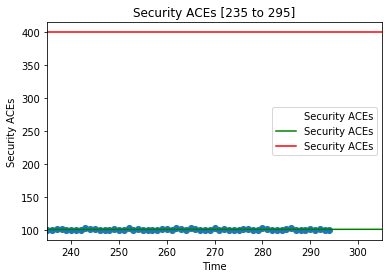

100.38396776882468 [0.00052792]


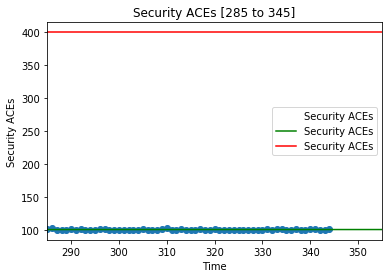

97.91121607854033 [0.00836343]


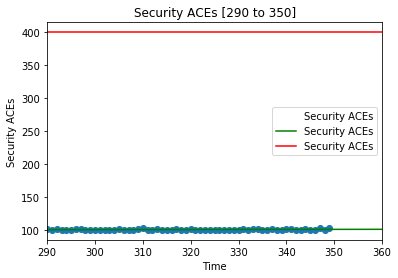

98.54207650273224 [0.00608502]


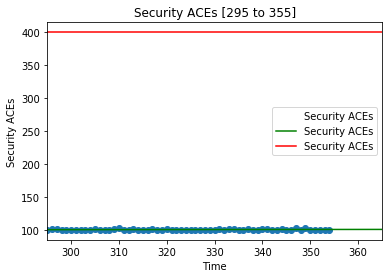

97.47545614522552 [0.00928036]


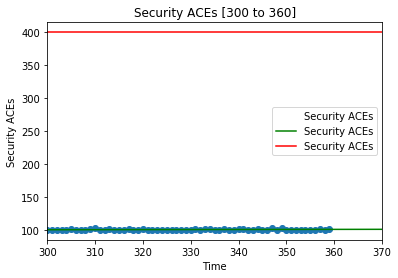

98.29502639622116 [0.0068908]


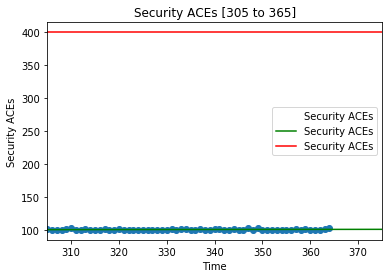

98.38823747337224 [0.00661295]


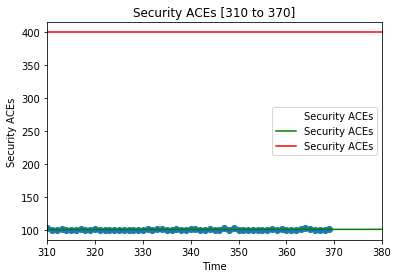

96.79244234509586 [0.01119755]


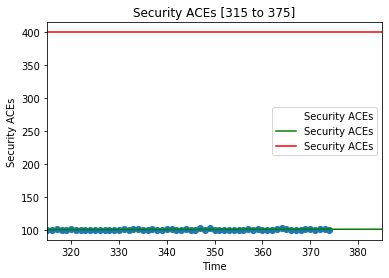

98.72997128832084 [0.00544596]


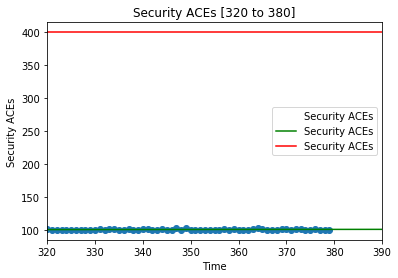

100.09536908400482 [0.00161156]


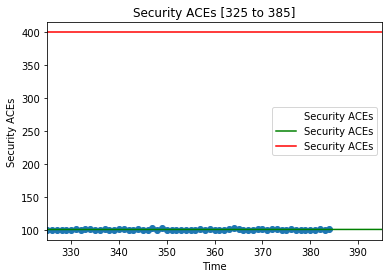

98.63577845697878 [0.00611281]


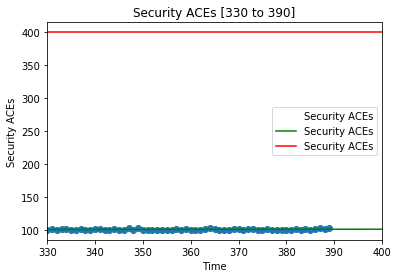

97.64012225618227 [0.00866907]


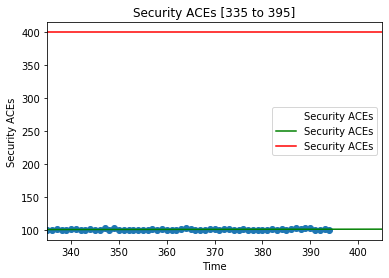

99.4717236269334 [0.0036399]


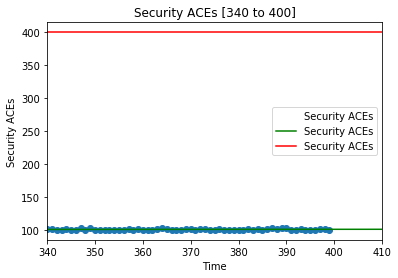

98.84373437065851 [0.00522367]


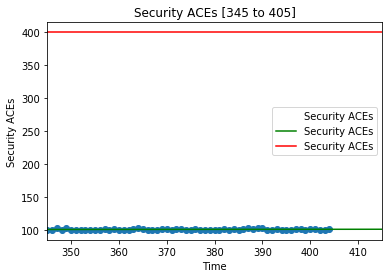

98.66659257201074 [0.00544596]


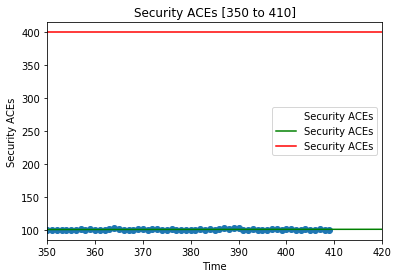

100.18594053903863 [0.0017227]


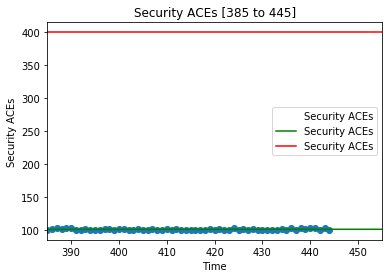

95.79292396035935 [0.01197555]


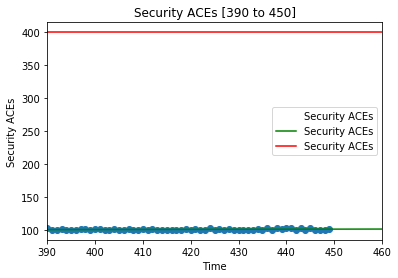

78.03062887839214 [0.05473743]


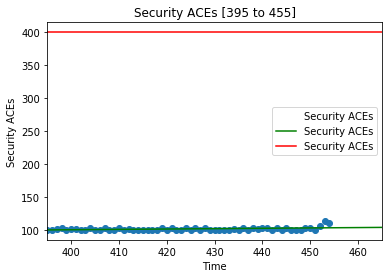

42.88845975733998 [0.13828841]


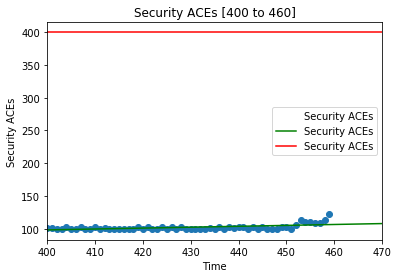

-73.17741039177554 [0.41122534]


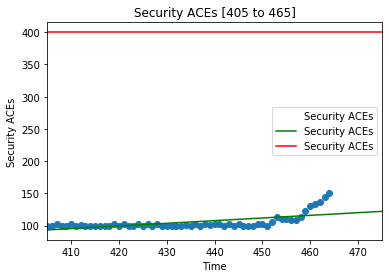

-206.80564971751423 [0.72033898]


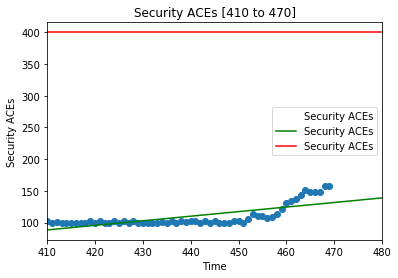

-336.47798462535894 [1.0149486]


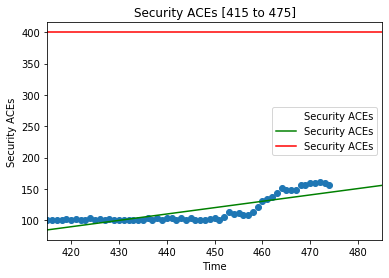

-431.6234972677598 [1.22622951]


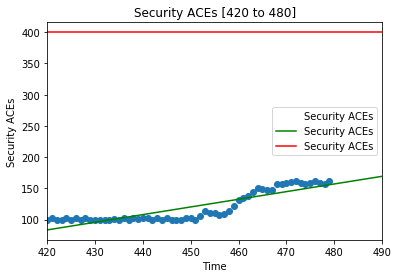

-499.41194776326773 [1.37285357]


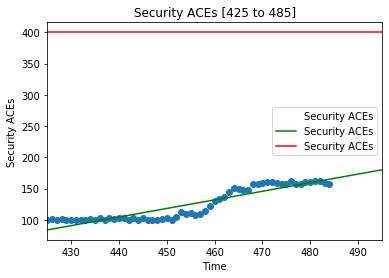

-574.03475965546 [1.53348152]


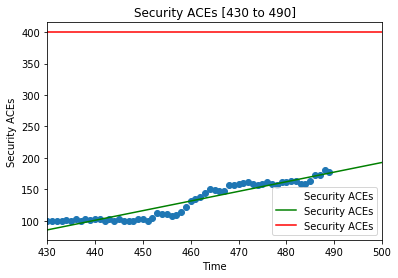

-613.4238029082155 [1.61558766]


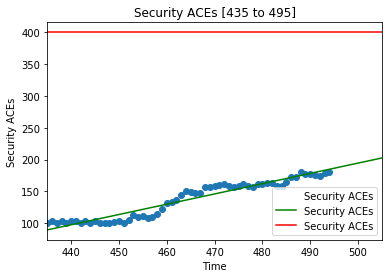

-614.5915346855611 [1.61464296]


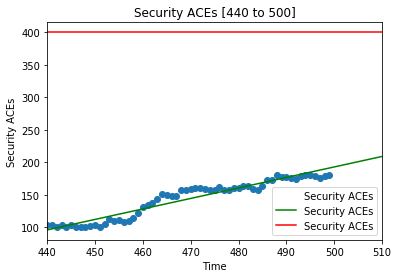

-613.0816430489954 [1.61025285]


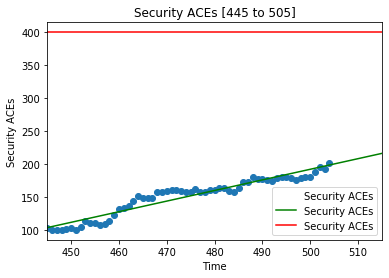

-640.8170788181905 [1.67160322]


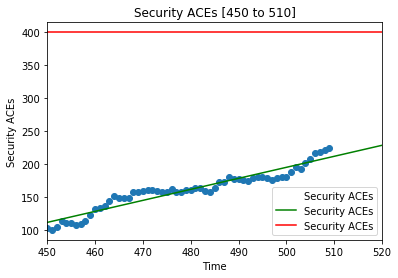

-701.2212003334262 [1.80241734]


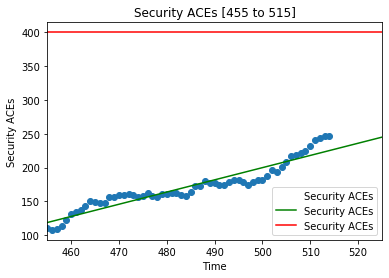

-745.5410206538855 [1.89872187]


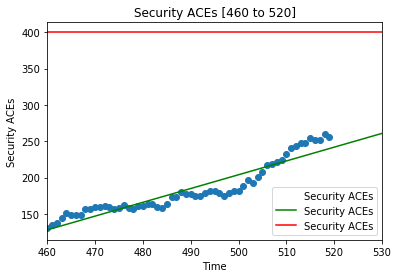

-859.484004816153 [2.13148097]


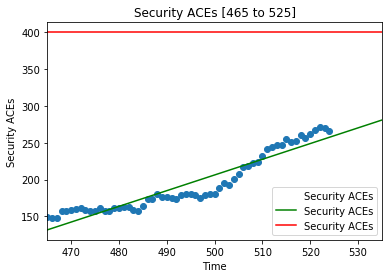

-949.0134759655464 [2.30883579]


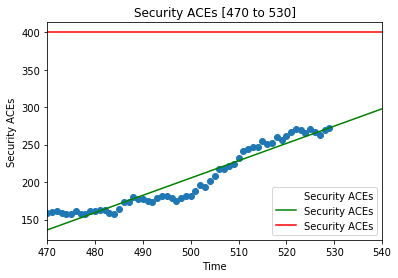

-1069.5335370936377 [2.54615171]


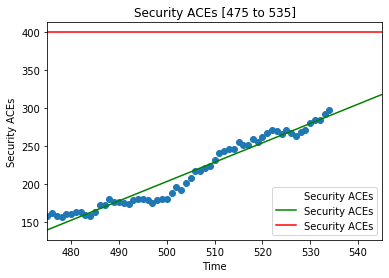

-1173.1308696860244 [2.74873576]


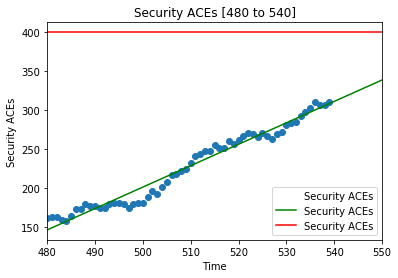

-1256.8708344910626 [2.91166991]


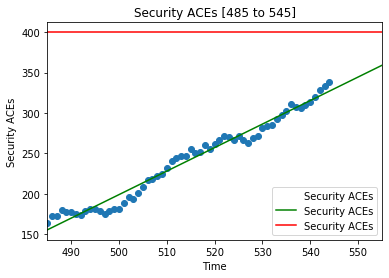

-1349.601472631287 [3.08960822]


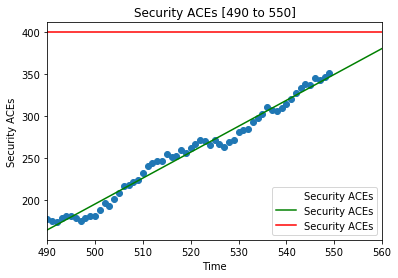

-1407.0086875984075 [3.19899972]


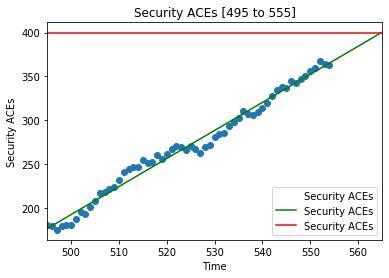

In [5]:
WINDOW_SIZE = 60
SAMPLE_EVERY = 5
LOOKAHEAD = 10
BREACH = 400


for i in range(0, 1440):
    if (i >= WINDOW_SIZE) and not (i % SAMPLE_EVERY):
        
        # create sample data frame
        sample_df = df.take([s for s in range(i - WINDOW_SIZE, i)])
        
        # do the linear regression, no train/test split
        x = sample_df.iloc[:, :-1].values
        y = sample_df.iloc[:, 1].values
        regressor = LinearRegression()
        regressor.fit(x, y)
        
        # plot the sample data if the gradient > 0
        if regressor.coef_ > 0.0:
            print(regressor.intercept_, regressor.coef_)

            # scatter plot of raw data
            ax = sample_df.plot(x='Time', y='Security ACEs', style='o')
            
            # add straight line for intercept & co-efficient
            x_line = [s for s in range(i - WINDOW_SIZE, i)] + [i + LOOKAHEAD]
            y_line = [regressor.intercept_ + regressor.coef_[0] * x for x in x_line]
            line_df = pd.DataFrame({'Time': x_line, 'Security ACEs': y_line})
            ax = line_df.plot(x='Time', y='Security ACEs', style='-g', ax=ax)
            
            # add a constant for the "breach" threshold
            breach_df = pd.DataFrame({
                'Time': x_line,
                'Security ACEs': [BREACH for _ in x_line]})
            ax = breach_df.plot(x='Time', y='Security ACEs', style='-r', ax=ax)
            
            # display plot
            plt.title('Security ACEs [%d to %d]' % (i - WINDOW_SIZE, i))
            plt.xlabel('Time')
            plt.ylabel('Security ACEs')
            plt.show()
            
            # if at lookahead time the value will breach the
            # arbitrary limit, break
            if y_line[-1] > BREACH:
                break
            